In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
# from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [236]:
for i,p in enumerate(model.parameters):
    print(i,":",p)

0 : Parameter('A20_0', 9075.0)
1 : Parameter('C8_0', 3799.0)
2 : Parameter('cIAP_0', 8986.0)
3 : Parameter('CYLD_0', 9075.0)
4 : Parameter('FADD_0', 3109.0)
5 : Parameter('FLIP_0', 3910.0)
6 : Parameter('LUBAC_0', 7226.0)
7 : Parameter('MLKLa_0', 5544.0)
8 : Parameter('RIP1_0', 22044.0)
9 : Parameter('RIP3_0', 10654.0)
10 : Parameter('TNF_0', 2326.0)
11 : Parameter('TNFR_0', 4809.0)
12 : Parameter('TRADD_0', 4696.0)
13 : Parameter('TRAF_0', 11776.0)
14 : Parameter('p1', 1e-06)
15 : Parameter('p2', 0.001)
16 : Parameter('p3', 0.001)
17 : Parameter('p4', 1e-06)
18 : Parameter('p5', 0.001)
19 : Parameter('p6', 1e-06)
20 : Parameter('p7', 0.001)
21 : Parameter('p8', 1e-06)
22 : Parameter('p9', 0.001)
23 : Parameter('p10', 1e-06)
24 : Parameter('p11', 0.001)
25 : Parameter('p12', 0.1)
26 : Parameter('p13', 1e-06)
27 : Parameter('p14', 0.001)
28 : Parameter('p15', 1e-06)
29 : Parameter('p16', 0.001)
30 : Parameter('p17', 0.1)
31 : Parameter('p18', 1e-06)
32 : Parameter('p19', 0.001)
33 : Par

In [ ]:
m1 = np.load('params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m2 = np.load('params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m3 = np.load('params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m4 = np.load('params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [276]:
m1 = np.load('params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m2 = np.load('params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m3 = np.load('params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m4 = np.load('params_testing/necro_pars10k_mode4_5720_modcylda20.npy')
m11 = np.load('params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m22 = np.load('params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m33 = np.load('params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m44 = np.load('params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [238]:
print(m1[:,43])
print(m1[:,44])
print(m1[:,45])
print(m1[:,46])
print(m1[:,47])

[9.54944079e-04 3.58962463e+01 2.67507430e+01 ... 4.39009911e-02
 8.43202949e-01 5.81285577e-02]
[2.39209291e-01 4.18071424e-03 5.36744125e-03 ... 1.12914438e-04
 4.74808585e-03 1.64518125e-02]
[5.28318555e-03 8.90347466e-02 1.55583650e-01 ... 8.90309304e-04
 1.09620234e-07 1.17871431e-08]
[3.50692934e+01 1.50683490e+01 4.26748760e+01 ... 2.81504633e+02
 9.12942804e-02 1.81652409e+00]
[0.1144724  0.04372281 0.02648548 ... 0.17106407 0.9251366  1.00653122]


In [277]:
m1[:,43] = m1[:,46]
m1[:,44] = m1[:,47]
m1[:,45] = m11[:,43]
m1[:,46] = m11[:,44]
m1[:,47] = m11[:,45]

In [278]:
m2[:,43] = m2[:,46]
m2[:,44] = m2[:,47]
m2[:,45] = m22[:,43]
m2[:,46] = m22[:,44]
m2[:,47] = m22[:,45]

In [279]:
m3[:,43] = m3[:,46]
m3[:,44] = m3[:,47]
m3[:,45] = m33[:,43]
m3[:,46] = m33[:,44]
m3[:,47] = m33[:,45]

In [280]:
m4[:,43] = m4[:,46]
m4[:,44] = m4[:,47]
m4[:,45] = m44[:,43]
m4[:,46] = m44[:,44]
m4[:,47] = m44[:,45]

In [281]:
print(m4[:,47])
print(m44[:,45])

[0.0018506  0.00187724 0.00078958 ... 0.00141431 0.0018442  0.00334819]
[0.0018506  0.00187724 0.00078958 ... 0.00141431 0.0018442  0.00334819]


In [240]:
print(m1[:,43])
print(m1[:,44])
print(m1[:,45])
print(m1[:,46])
print(m1[:,47])

[3.50692934e+01 1.50683490e+01 4.26748760e+01 ... 2.81504633e+02
 9.12942804e-02 1.81652409e+00]
[0.1144724  0.04372281 0.02648548 ... 0.17106407 0.9251366  1.00653122]
[9.54944079e-04 3.58962463e+01 2.67507430e+01 ... 4.39009911e-02
 8.43202949e-01 5.81285577e-02]
[2.39209291e-01 4.18071424e-03 5.36744125e-03 ... 1.12914438e-04
 4.74808585e-03 1.64518125e-02]
[5.28318555e-03 8.90347466e-02 1.55583650e-01 ... 8.90309304e-04
 1.09620234e-07 1.17871431e-08]


In [282]:
m1 = m1[:,14:]
m2 = m2[:,14:]
m3 = m3[:,14:]
m4 = m4[:,14:]

In [263]:
print(m1.shape)

(3605, 40)


In [ ]:
np.save('params_testing/necro_pars10k_mode1_5720_modr1r3.npy', m1)
np.save('params_testing/necro_pars10k_mode2_5720_modr1r3.npy', m2)
np.save('params_testing/necro_pars10k_mode3_5720_modr1r3.npy', m3)
np.save('params_testing/necro_pars10k_mode4_5720_modr1r3.npy', m4)

In [ ]:
mode1_100 = np.load('params_testing/necro_pars10k_mode1_5720_mod.npy')[:, 14:]
mode2_100 = np.load('params_testing/necro_pars10k_mode2_5720_mod.npy')[:, 14:]
mode3_100 = np.load('params_testing/necro_pars10k_mode3_5720_mod.npy')[:, 14:]
mode4_100 = np.load('params_testing/necro_pars10k_mode4_5720_mod.npy')[:, 14:]

In [ ]:
print(len(mode1_100))
print(len(mode2_100))
print(len(mode3_100))
print(len(mode4_100))

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus0_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode1',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode1_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode1mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus1_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode2',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode2_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode2mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus2_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode3',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode3_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode3mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus3_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode4',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode4_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode4mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
# cI_kf_tradd (R4)
# I_kr_traf2 (R8)
# cI_kf_a20 (R15)
# Ia20_kf_cII (R17)
# cIcyld_kf_cII (R20)
# cII_kf_c8a (R27)
# cII_kr_c8a (R28)
# cIIr3_kf_c8flr1trc (R32)
# cII_kf_mlkl (R38)

In [ ]:
a = mode1_100[:, 3]
mode1_varpars.shape

In [6]:
for i,p in enumerate(model.parameters_rules()):
    print(i,":",p)

0 : Parameter('p1', 1e-06)
1 : Parameter('p2', 0.001)
2 : Parameter('p3', 0.001)
3 : Parameter('p4', 1e-06)
4 : Parameter('p5', 0.001)
5 : Parameter('p6', 1e-06)
6 : Parameter('p7', 0.001)
7 : Parameter('p8', 1e-06)
8 : Parameter('p9', 0.001)
9 : Parameter('p10', 1e-06)
10 : Parameter('p11', 0.001)
11 : Parameter('p12', 0.1)
12 : Parameter('p13', 1e-06)
13 : Parameter('p14', 0.001)
14 : Parameter('p15', 1e-06)
15 : Parameter('p16', 0.001)
16 : Parameter('p17', 0.1)
17 : Parameter('p18', 1e-06)
18 : Parameter('p19', 0.001)
19 : Parameter('p20', 0.1)
20 : Parameter('p21', 0.1)
21 : Parameter('p22', 3.11e-07)
22 : Parameter('p23', 3.27e-06)
23 : Parameter('p24', 0.018)
24 : Parameter('p25', 3.27e-06)
25 : Parameter('p26', 0.018)
26 : Parameter('p27', 0.0327)
27 : Parameter('p28', 0.018)
28 : Parameter('p29', 1e-06)
29 : Parameter('p30', 1e-06)
30 : Parameter('p31', 0.001)
31 : Parameter('p32', 0.1)
32 : Parameter('p33', 0.01)
33 : Parameter('p34', 0.001)
34 : Parameter('p35', 0.001)
35 : 

In [264]:
#1, 9, 17, 12, 23, 26, 31, 37, 39 remove 38
#4, 15, 19, 20, 27, 28, 32
# thirtyeight1 = m1[:, 0] #1
four1 = m1[:, 3] #4
# thirtyeight12 = m1[:, 8] #9
thirtyeight14 = m1[:, 11] #12
thirtyeight11 = m1[:, 12] #13
fifteen1 = m1[:, 14] #15
# thirtyeight13 = m1[:, 16] #17
nineteen1 = m1[:, 18] #19
twenty1 = m1[:, 19] #20
# thirtyeight15 = m1[:, 22] #23
# thirtyeight16 = m1[:, 25]#26
twentyseven1 = m1[:, 26] #27
twentyeight1 = m1[:, 27] #28
# thirtyeight17 = m1[:, 30] #31
thirtytwo1 = m1[:, 33] #32
thirtyeight18 = m1[:, 37] #38
# thirtyeight19 = m1[:, 38] #39
mode1_varpars11 = np.stack([ four1, thirtyeight14, thirtyeight11, fifteen1, nineteen1, 
                            twenty1, 
                           twentyseven1, twentyeight1, 
                               thirtytwo1, thirtyeight18], axis = -1)

# mode1_varpars11 = np.stack([thirtyeight1, four1, thirtyeight12, thirtyeight14, fifteen1, thirtyeight13,
#                            nineteen1, twenty1, thirtyeight15,thirtyeight16,
#                            twentyseven1, twentyeight1, thirtyeight17,
#                                thirtytwo1, thirtyeight18, thirtyeight19], axis = -1)

In [265]:
dfm1_16 = pd.DataFrame(np.log10(mode1_varpars11), columns = ['p4',  'p12', 'p13', 'p15', 
                    'p19', 'p20',  'p27', 'p28',  'p34','p38'])
dfm1_16.to_pickle('param_files/mode1mod_varpars10upm.pickle')

In [266]:
#1, 9, 17, 12, 23, 26, 31, 37, 39 remove 38
#4, 15, 19, 20, 27, 28, 32
# thirtyeight1 = m1[:, 0] #1
four1 = m2[:, 3] #4
# thirtyeight12 = m1[:, 8] #9
thirtyeight14 = m2[:, 11] #12
thirtyeight11 = m2[:, 12] #13
fifteen1 = m2[:, 14] #15
# thirtyeight13 = m1[:, 16] #17
nineteen1 = m2[:, 18] #19
twenty1 = m2[:, 19] #20
# thirtyeight15 = m1[:, 22] #23
# thirtyeight16 = m1[:, 25]#26
twentyseven1 = m2[:, 26] #27
twentyeight1 = m2[:, 27] #28
# thirtyeight17 = m1[:, 30] #31
thirtytwo1 = m2[:, 33] #32
thirtyeight18 = m2[:, 37] #38
# thirtyeight19 = m1[:, 38] #39
mode1_varpars2 = np.stack([ four1, thirtyeight14, thirtyeight11, fifteen1, nineteen1, 
                            twenty1, 
                           twentyseven1, twentyeight1, 
                               thirtytwo1, thirtyeight18], axis = -1)

In [267]:
dfm2_9 = pd.DataFrame(np.log10(mode1_varpars2), columns = ['p4',  'p12', 'p13', 'p15', 
                    'p19', 'p20',  'p27', 'p28',  'p34','p38'])
dfm2_9.to_pickle('param_files/mode2mod_varpars10upm.pickle')

In [268]:
#1, 9, 17, 12, 23, 26, 31, 37, 39 remove 38
#4, 15, 19, 20, 27, 28, 32
# thirtyeight1 = m1[:, 0] #1
four1 = m3[:, 3] #4
# thirtyeight12 = m1[:, 8] #9
thirtyeight14 = m3[:, 11] #12
thirtyeight11 = m3[:, 12] #13
fifteen1 = m3[:, 14] #15
# thirtyeight13 = m1[:, 16] #17
nineteen1 = m3[:, 18] #19
twenty1 = m3[:, 19] #20
# thirtyeight15 = m1[:, 22] #23
# thirtyeight16 = m1[:, 25]#26
twentyseven1 = m3[:, 26] #27
twentyeight1 = m3[:, 27] #28
# thirtyeight17 = m1[:, 30] #31
thirtytwo1 = m3[:, 33] #32
thirtyeight18 = m3[:, 37] #38
# thirtyeight19 = m1[:, 38] #39
mode1_varpars3 = np.stack([ four1, thirtyeight14, thirtyeight11, fifteen1, nineteen1, 
                            twenty1, 
                           twentyseven1, twentyeight1, 
                               thirtytwo1, thirtyeight18], axis = -1)

In [269]:
dfm3_9 = pd.DataFrame(np.log10(mode1_varpars3), columns = ['p4',  'p12', 'p13', 'p15', 
                    'p19', 'p20',  'p27', 'p28',  'p34','p38'])
dfm3_9.to_pickle('param_files/mode3mod_varpars10upm.pickle')

In [270]:
#1, 9, 17, 12, 23, 26, 31, 37, 39 remove 38
#4, 15, 19, 20, 27, 28, 32
# thirtyeight1 = m1[:, 0] #1
four1 = m4[:, 3] #4
# thirtyeight12 = m1[:, 8] #9
thirtyeight14 = m4[:, 11] #12
thirtyeight11 = m4[:, 12] #13
fifteen1 = m4[:, 14] #15
# thirtyeight13 = m1[:, 16] #17
nineteen1 = m4[:, 18] #19
twenty1 = m4[:, 19] #20
# thirtyeight15 = m1[:, 22] #23
# thirtyeight16 = m1[:, 25]#26
twentyseven1 = m4[:, 26] #27
twentyeight1 = m4[:, 27] #28
# thirtyeight17 = m1[:, 30] #31
thirtytwo1 = m4[:, 33] #32
thirtyeight18 = m4[:, 37] #38
# thirtyeight19 = m1[:, 38] #39
mode1_varpars4 = np.stack([ four1, thirtyeight14, thirtyeight11, fifteen1, nineteen1, 
                            twenty1, 
                           twentyseven1, twentyeight1, 
                               thirtytwo1, thirtyeight18], axis = -1)

In [271]:
dfm4_9 = pd.DataFrame(np.log10(mode1_varpars4), columns = ['p4',  'p12', 'p13', 'p15', 
                    'p19', 'p20',  'p27', 'p28',  'p34','p38'])
dfm4_9.to_pickle('param_files/mode4mod_varpars10upm.pickle')

In [32]:
# # filename for each dataset i'm comparing, keyed on that dataset's name
# # obviously don't need this if you're not comparing between datasets or other conditions
# filenamedict = {
#     'M1':'param_files/mode1mod_varpars9up.pickle',
#     'M2':'param_files/mode2mod_varpars9up.pickle',
#     'M3':'param_files/mode3mod_varpars9up.pickle',
#     'M4':'param_files/mode4mod_varpars9up.pickle'
# }

# parameter_names = ['p4', 'p15', 
#                     'p19', 'p20', 'p27', 'p28', 'p32', 'p38']
# #your parameter names that you want to make the figure with
# # for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# # totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# # can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

# totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
# boxdf = pd.DataFrame()      # boxdf is built per dataset
# dictfordf = {}
# for resdir in ['M1','M2','M3','M4']:
#     dictfordf[resdir] = {}
#     filename = filenamedict[resdir] 
#     post_params = pd.read_pickle(filename)
#     for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
#         try:
#             if np.isnan(post_params[i]).all():
#                 continue
#             post_params[i][post_params[i] == np.inf] = np.nan
#             post_params[i][post_params[i] == -np.inf] = np.nan
#             # below is what i used which i leave in for completeness, but line 64 should work for most purposes
#             #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
#             #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
#             #dictfordf[resdir][i] = list(k.resample(1000)[0])
#             dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
#         except KeyError:
#             print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
#             pass
#     dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
#     boxdf = pd.DataFrame(dictfordf[resdir])
#     totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
#     boxdf = pd.DataFrame()

# # this puts the df in the format sns.boxplot() is expecting
# dfvar = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

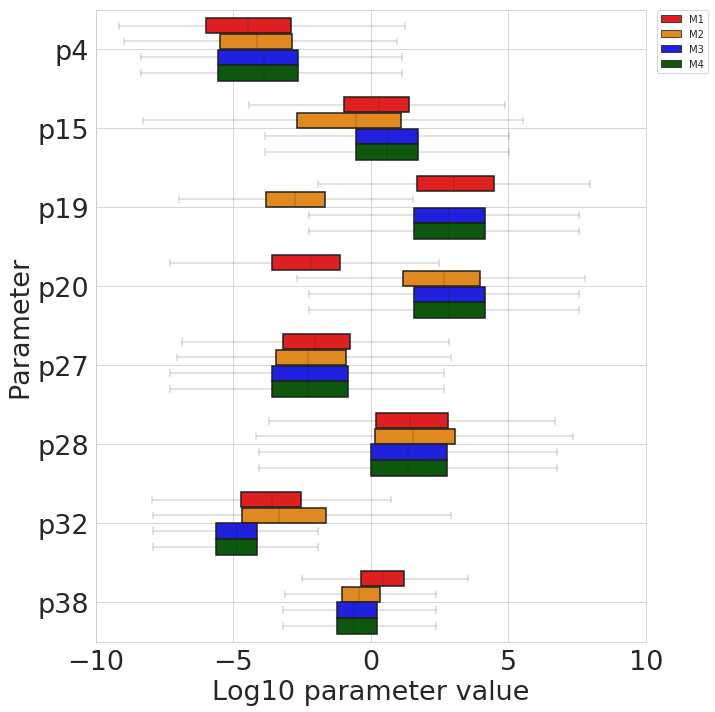

In [33]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1
colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(10, 10))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar, showfliers=False, boxprops=dict(alpha=1))#,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels())
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log10 parameter value',fontsize=27)
plt.ylabel('Parameter',fontsize=27)
plt.xlim(xmin = -10, xmax = 10)
ax.grid(True)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# left = ax.spines["left"]
# left.set_visible(False)
plt.tight_layout()
# plt.savefig('allmodes_8varpars_updatedmodespots_boxplot_fittedparams_newcolors_up.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [272]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'M1':'param_files/mode1mod_varpars10upm.pickle',
    'M2':'param_files/mode2mod_varpars10upm.pickle',
    'M3':'param_files/mode3mod_varpars10upm.pickle',
    'M4':'param_files/mode4mod_varpars10upm.pickle'
}

parameter_names = ['p4',  'p12', 'p13', 'p15', 
                    'p19', 'p20',  'p27', 'p28',  'p34','p38']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['M1','M2','M3','M4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
dfvar = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

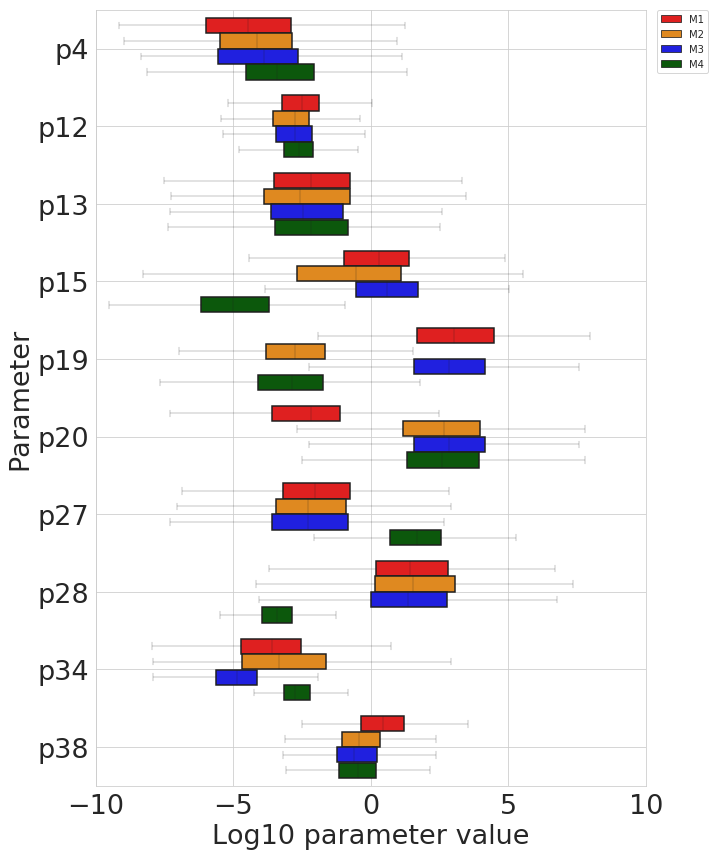

In [297]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1
colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(10, 12))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar, showfliers=False, boxprops=dict(alpha=1))#,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels())
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log10 parameter value',fontsize=27)
plt.ylabel('Parameter',fontsize=27)
plt.xlim(xmin = -10, xmax = 10)
ax.grid(True)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# left = ax.spines["left"]
# left.set_visible(False)
plt.tight_layout()
plt.savefig('allmodes_10varpars_updatedmodespots_boxplot_fittedparams_newcolors_sigsr1r3.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

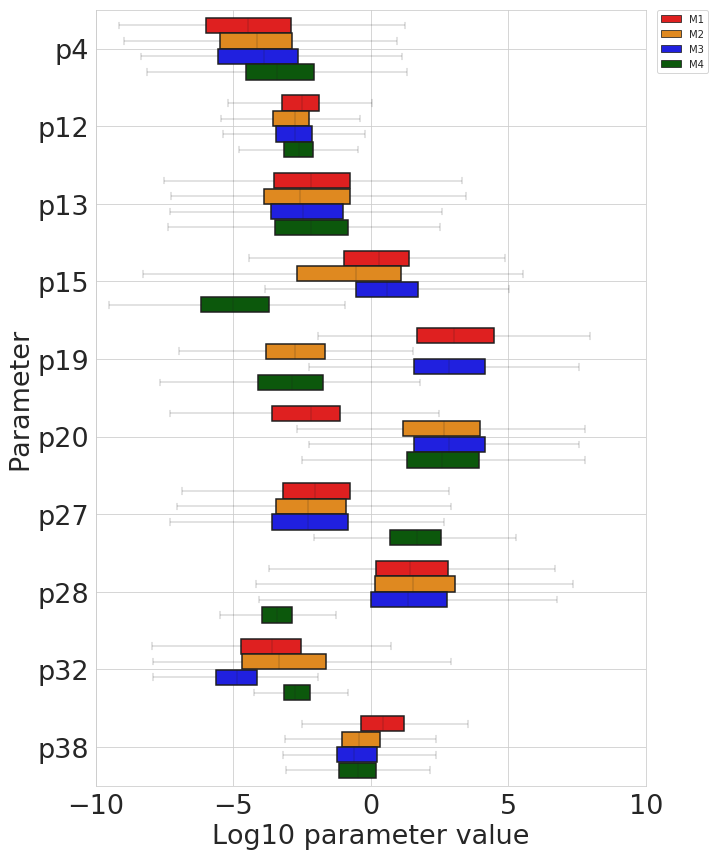

In [233]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1
colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(10, 12))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar, showfliers=False, boxprops=dict(alpha=1))#,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels())
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log10 parameter value',fontsize=27)
plt.ylabel('Parameter',fontsize=27)
plt.xlim(xmin = -10, xmax = 10)
ax.grid(True)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# left = ax.spines["left"]
# left.set_visible(False)
plt.tight_layout()
plt.savefig('allmodes_10varpars_updatedmodespots_boxplot_fittedparams_newcolors_sigs.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
my_array120 = mode1_100[:, :20]

dfm120 = pd.DataFrame(np.log10(my_array120), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm120.to_pickle('param_files/df20_mode1mod_names.pickle')

In [ ]:
my_array220 = mode2_100[:, :20]

dfm220 = pd.DataFrame(np.log10(my_array220), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm220.to_pickle('param_files/df20_mode2mod_names.pickle')

In [ ]:
my_array320 = mode3_100[:, :20]

dfm320 = pd.DataFrame(np.log10(my_array320), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm320.to_pickle('param_files/df20_mode3mod_names.pickle')

In [ ]:
my_array420 = mode4_100[:, :20]

dfm420 = pd.DataFrame(np.log10(my_array420), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm420.to_pickle('param_files/df20_mode4mod_names.pickle')

In [ ]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'param_files/df20_mode1mod_names.pickle',
    'Mode2':'param_files/df20_mode2mod_names.pickle',
    'Mode3':'param_files/df20_mode3mod_names.pickle',
    'Mode4':'param_files/df20_mode4mod_names.pickle'
}

parameter_names = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                   'cI_kf_traf2', 'cI_kr_traf2', 'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld','cI_kr_cyld', 'cIcyld_kf_cII']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df20 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

In [ ]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(10, 20))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
# plt.savefig('mode1_first20pars_boxplot_fittedparams.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
# plt.savefig('mode1_first20pars_boxplot_fittedparams_rot.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
#['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      #'p11r', 'p12f']

In [ ]:
my_array120 = mode1_100[:, :20]

dfm120 = pd.DataFrame(np.log10(my_array120), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm120.to_pickle('param_files/df20_mode1mod.pickle')

In [ ]:
my_array220 = mode2_100[:, :20]

dfm220 = pd.DataFrame(np.log10(my_array220), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm220.to_pickle('param_files/df20_mode2mod.pickle')

In [ ]:
my_array320 = mode3_100[:, :20]

dfm320 = pd.DataFrame(np.log10(my_array320), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm320.to_pickle('param_files/df20_mode3mod.pickle')

In [ ]:
my_array420 = mode4_100[:, :20]

dfm420 = pd.DataFrame(np.log10(my_array420), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm420.to_pickle('param_files/df20_mode4mod.pickle')

In [ ]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'param_files/df20_mode1mod.pickle',
    'Mode2':'param_files/df20_mode2mod.pickle',
    'Mode3':'param_files/df20_mode3mod.pickle',
    'Mode4':'param_files/df20_mode4mod.pickle'
}

parameter_names = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df20 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
# plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
# plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
# plt.savefig('modes_last20pars_boxplot_fittedparams_rot.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# ['p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
#                                       'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
#                                       'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f']

In [ ]:
my_array140 = mode1_100[:, 20:]

dfm140 = pd.DataFrame(np.log10(my_array140), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm140.to_pickle('df40_mode1.pickle')

In [ ]:
my_array240 = mode2_100[:, 20:]

dfm240 = pd.DataFrame(np.log10(my_array240), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm240.to_pickle('df40_mode2.pickle')

In [ ]:
my_array340 = mode3_100[:, 20:]

dfm340 = pd.DataFrame(np.log10(my_array340), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm340.to_pickle('df40_mode3.pickle')

In [ ]:
my_array440 = mode4_100[:, 20:]

dfm440 = pd.DataFrame(np.log10(my_array440), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm440.to_pickle('df40_mode4.pickle')

In [ ]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'df40_mode1.pickle',
    'Mode2':'df40_mode2.pickle',
    'Mode3':'df40_mode3.pickle',
    'Mode4':'df40_mode4.pickle'
}

parameter_names = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df40 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

In [ ]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(10, 20))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df40,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
# plt.savefig('mode1_first20pars_boxplot_fittedparams.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [283]:
my_array1 = m1[:, :20]

dfm1 = pd.DataFrame(np.log10(my_array1), columns = ['p1','p2','p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 
                                      'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 
                                      'p19', 'p20'])
dfm1.to_pickle('df_mode1_mod20upm.pickle')

In [284]:
my_array1t = m1[:, 20:]

dfm1t = pd.DataFrame(np.log10(my_array1t), columns = ['p21', 'p22', 'p23', 'p24', 'p25', 'p26', 
                                      'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 
                                      'p36', 'p37', 'p38', 'p39', 'p40'])
dfm1t.to_pickle('df_mode1_mod40upm.pickle')

In [285]:
my_array2 = m2[:, :20]

dfm2 = pd.DataFrame(np.log10(my_array2), columns = ['p1','p2','p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 
                                      'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 
                                      'p19', 'p20'])
dfm2.to_pickle('df_mode2_mod20upm.pickle')

In [286]:
my_array2t = m2[:, 20:]

dfm2t = pd.DataFrame(np.log10(my_array2t), columns = ['p21', 'p22', 'p23', 'p24', 'p25', 'p26', 
                                      'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 
                                      'p36', 'p37', 'p38', 'p39', 'p40'])
dfm2t.to_pickle('df_mode2_mod40upm.pickle')

In [287]:
my_array3 =m3[:, :20]

dfm3 = pd.DataFrame(np.log10(my_array3), columns = ['p1','p2','p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 
                                      'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 
                                      'p19', 'p20'])
dfm3.to_pickle('df_mode3_mod20upm.pickle')

In [288]:
my_array3t =m3[:, 20:]

dfm3t = pd.DataFrame(np.log10(my_array3t), columns = ['p21', 'p22', 'p23', 'p24', 'p25', 'p26', 
                                      'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 
                                      'p36', 'p37', 'p38', 'p39', 'p40'])
dfm3t.to_pickle('df_mode3_mod40upm.pickle')

In [289]:
my_array4 = m4[:, :20]

dfm4 = pd.DataFrame(np.log10(my_array4), columns = ['p1','p2','p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 
                                      'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 
                                      'p19', 'p20'])
dfm4.to_pickle('df_mode4_mod20upm.pickle')

In [290]:
my_array4t = m4[:, 20:]

dfm4t = pd.DataFrame(np.log10(my_array4t), columns = ['p21', 'p22', 'p23', 'p24', 'p25', 'p26', 
                                      'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 
                                      'p36', 'p37', 'p38', 'p39', 'p40'])
dfm4t.to_pickle('df_mode4_mod40upm.pickle')

In [90]:
from scipy.stats import ttest_ind

In [95]:
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
from scipy.stats import median_test

In [104]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
print('P1')
fvalue, pvalue = stats.f_oneway(dfm1['p1'], dfm2['p1'], dfm3['p1'], dfm4['p1'])
print(fvalue, pvalue)
print('P2')
fvalue, pvalue = stats.f_oneway(dfm1['p2'], dfm2['p2'], dfm3['p2'], dfm4['p2'])
print(fvalue, pvalue)
print('P3')
fvalue, pvalue = stats.f_oneway(dfm1['p3'], dfm2['p3'], dfm3['p3'], dfm4['p3'])
print(fvalue, pvalue)
print('P4')
fvalue, pvalue = stats.f_oneway(dfm1['p4'], dfm2['p4'], dfm3['p4'], dfm4['p4'])
print(fvalue, pvalue)
print('P5')
fvalue, pvalue = stats.f_oneway(dfm1['p5'], dfm2['p5'], dfm3['p5'], dfm4['p5'])
print(fvalue, pvalue)
print('P6')
fvalue, pvalue = stats.f_oneway(dfm1['p6'], dfm2['p6'], dfm3['p6'], dfm4['p6'])
print(fvalue, pvalue)
print('P7')
fvalue, pvalue = stats.f_oneway(dfm1['p7'], dfm2['p7'], dfm3['p7'], dfm4['p7'])
print(fvalue, pvalue)
print('P8')
fvalue, pvalue = stats.f_oneway(dfm1['p8'], dfm2['p8'], dfm3['p8'], dfm4['p8'])
print(fvalue, pvalue)
print('P9')
fvalue, pvalue = stats.f_oneway(dfm1['p9'], dfm2['p9'], dfm3['p9'], dfm4['p9'])
print(fvalue, pvalue)
print('P10')
fvalue, pvalue = stats.f_oneway(dfm1['p10'], dfm2['p10'], dfm3['p10'], dfm4['p10'])
print(fvalue, pvalue)

P1
70.82724060531389 1.587806292947326e-45
P2
2.373460670278443 0.06819555155423772
P3
2.4327833884506416 0.06300898755025655
P4
62.75807611542022 2.3586280920059478e-40
P5
24.384573961004868 9.698460207164753e-16
P6
13.541808065229075 8.028193508736928e-09
P7
11.947705087971332 8.22290955950272e-08
P8
7.846838150547819 3.137756292142281e-05
P9
37.72064908625245 2.7343593559284976e-24
P10
8.735228902645298 8.715144864414547e-06


In [106]:
print('P11')
fvalue, pvalue = stats.f_oneway(dfm1['p11'], dfm2['p11'], dfm3['p11'], dfm4['p11'])
print(fvalue, pvalue)
print('P12')
fvalue, pvalue = stats.f_oneway(dfm1['p12'], dfm2['p12'], dfm3['p12'], dfm4['p12'])
print(fvalue, pvalue)
print('P13')
fvalue, pvalue = stats.f_oneway(dfm1['p13'], dfm2['p13'], dfm3['p13'], dfm4['p13'])
print(fvalue, pvalue)
print('P14')
fvalue, pvalue = stats.f_oneway(dfm1['p14'], dfm2['p14'], dfm3['p14'], dfm4['p14'])
print(fvalue, pvalue)
print('P15')
fvalue, pvalue = stats.f_oneway(dfm1['p15'], dfm2['p15'], dfm3['p15'], dfm4['p15'])
print(fvalue, pvalue)
print('P16')
fvalue, pvalue = stats.f_oneway(dfm1['p16'], dfm2['p16'], dfm3['p16'], dfm4['p16'])
print(fvalue, pvalue)
print('P17')
fvalue, pvalue = stats.f_oneway(dfm1['p17'], dfm2['p17'], dfm3['p17'], dfm4['p17'])
print(fvalue, pvalue)
print('P18')
fvalue, pvalue = stats.f_oneway(dfm1['p18'], dfm2['p18'], dfm3['p18'], dfm4['p18'])
print(fvalue, pvalue)
print('P19')
fvalue, pvalue = stats.f_oneway(dfm1['p19'], dfm2['p19'], dfm3['p19'], dfm4['p19'])
print(fvalue, pvalue)
print('P20')
fvalue, pvalue = stats.f_oneway(dfm1['p20'], dfm2['p20'], dfm3['p20'], dfm4['p20'])
print(fvalue, pvalue)

P11
6.952205211263164 0.00011338020291257847
P12
30.521836381147224 1.1339048943126453e-19
P13
4.8409733369319445 0.0022791978513578004
P14
7.6521296442602855 4.1520486823815806e-05
P15
1409.2053639366004 0.0
P16
11.461445322660127 1.6696923018281158e-07
P17
44.91813445092133 6.574689989490491e-29
P18
44.53131364107019 1.1644704194806513e-28
P19
2141.350784148769 0.0
P20
584.6089102702349 0.0


In [108]:
print('P21')
fvalue, pvalue = stats.f_oneway(dfm1t['p21'], dfm2t['p21'], dfm3t['p21'], dfm4t['p21'])
print(fvalue, pvalue)
print('P22')
fvalue, pvalue = stats.f_oneway(dfm1t['p22'], dfm2t['p22'], dfm3t['p22'], dfm4t['p22'])
print(fvalue, pvalue)
print('P23')
fvalue, pvalue = stats.f_oneway(dfm1t['p23'], dfm2t['p23'], dfm3t['p23'], dfm4t['p23'])
print(fvalue, pvalue)
print('P24')
fvalue, pvalue = stats.f_oneway(dfm1t['p24'], dfm2t['p24'], dfm3t['p24'], dfm4t['p24'])
print(fvalue, pvalue)
print('P25')
fvalue, pvalue = stats.f_oneway(dfm1t['p25'], dfm2t['p25'], dfm3t['p25'], dfm4t['p25'])
print(fvalue, pvalue)
print('P26')
fvalue, pvalue = stats.f_oneway(dfm1t['p26'], dfm2t['p26'], dfm3t['p26'], dfm4t['p26'])
print(fvalue, pvalue)
print('P27')
fvalue, pvalue = stats.f_oneway(dfm1t['p27'], dfm2t['p27'], dfm3t['p27'], dfm4t['p27'])
print(fvalue, pvalue)
print('P28')
fvalue, pvalue = stats.f_oneway(dfm1t['p28'], dfm2t['p28'], dfm3t['p28'], dfm4t['p28'])
print(fvalue, pvalue)
print('P29')
fvalue, pvalue = stats.f_oneway(dfm1t['p29'], dfm2t['p29'], dfm3t['p29'], dfm4t['p29'])
print(fvalue, pvalue)
print('P30')
fvalue, pvalue = stats.f_oneway(dfm1t['p30'], dfm2t['p30'], dfm3t['p30'], dfm4t['p30'])
print(fvalue, pvalue)

P21
15.327257544672237 6.000798761384452e-10
P22
4.697514290801466 0.002793189639429264
P23
5.299769142756776 0.0011954459053235352
P24
26.500395619766923 4.536383385057398e-17
P25
12.71531082173413 2.719153188979629e-08
P26
63.8008048146296 7.059452514255297e-41
P27
1874.8618095048762 0.0
P28
2836.956427583193 0.0
P29
3.0352496746395845 0.027961511339691218
P30
105.68947956020608 2.0155773421096137e-67


In [111]:
print('P31')
fvalue, pvalue = stats.f_oneway(dfm1t['p31'], dfm2t['p31'], dfm3t['p31'], dfm4t['p31'])
print(fvalue, pvalue)
print('P32')
fvalue, pvalue = stats.f_oneway(dfm1t['p32'], dfm2t['p32'], dfm3t['p32'], dfm4t['p32'])
print(fvalue, pvalue)
print('P33')
fvalue, pvalue = stats.f_oneway(dfm1t['p33'], dfm2t['p33'], dfm3t['p33'], dfm4t['p33'])
print(fvalue, pvalue)
print('P34')
fvalue, pvalue = stats.f_oneway(dfm1t['p34'], dfm2t['p34'], dfm3t['p34'], dfm4t['p34'])
print(fvalue, pvalue)
print('P35')
fvalue, pvalue = stats.f_oneway(dfm1t['p35'], dfm2t['p35'], dfm3t['p35'], dfm4t['p35'])
print(fvalue, pvalue)
print('P36')
fvalue, pvalue = stats.f_oneway(dfm1t['p36'], dfm2t['p36'], dfm3t['p36'], dfm4t['p36'])
print(fvalue, pvalue)
print('P37')
fvalue, pvalue = stats.f_oneway(dfm1t['p37'], dfm2t['p37'], dfm3t['p37'], dfm4t['p37'])
print(fvalue, pvalue)
print('P38')
fvalue, pvalue = stats.f_oneway(dfm1t['p38'], dfm2t['p38'], dfm3t['p38'], dfm4t['p38'])
print(fvalue, pvalue)
print('P39')
fvalue, pvalue = stats.f_oneway(dfm1t['p39'], dfm2t['p39'], dfm3t['p39'], dfm4t['p39'])
print(fvalue, pvalue)
print('P40')
fvalue, pvalue = stats.f_oneway(dfm1t['p40'], dfm2t['p40'], dfm3t['p40'], dfm4t['p40'])
print(fvalue, pvalue)

P31
17.530567180601896 2.3846269268228382e-11
P32
683.1634521038809 0.0
P33
5.327610039728947 0.0011493045991118522
P34
0.23371754544027135 0.8729304841654044
P35
11.99326854293983 7.783084389460503e-08
P36
66.05619470162873 2.5900045365419347e-42
P37
66.03318741310154 2.6788014307736277e-42
P38
537.3119453981365 0.0
P39
36.684060159642435 1.4119683842696174e-23
P40
208.13571963166086 3.4248452946465243e-131


In [175]:
print(ks_2samp(dfm1['p7'], dfm2['p7']))
print(ks_2samp(dfm1['p7'], dfm3['p7']))
print(ks_2samp(dfm1['p7'], dfm4['p7']))
print(ks_2samp(dfm2['p7'], dfm3['p7']))
print(ks_2samp(dfm2['p7'], dfm4['p7']))
print(ks_2samp(dfm3['p7'], dfm4['p7']))

Ks_2sampResult(statistic=0.04764374253055981, pvalue=1.25150205001284e-05)
Ks_2sampResult(statistic=0.041351601317754394, pvalue=0.005518926813292019)
Ks_2sampResult(statistic=0.04446345885873826, pvalue=0.010940897805481176)
Ks_2sampResult(statistic=0.08269364273164098, pvalue=3.959020280057831e-08)
Ks_2sampResult(statistic=0.03934387431352615, pvalue=0.07675563935142231)
Ks_2sampResult(statistic=0.06553069193058375, pvalue=0.0011435878613825054)


In [176]:
print(ks_2samp(dfm1t['p40'], dfm2t['p40']))
print(ks_2samp(dfm1t['p40'], dfm3t['p40']))
print(ks_2samp(dfm1t['p40'], dfm4t['p40']))
print(ks_2samp(dfm2t['p40'], dfm3t['p40']))
print(ks_2samp(dfm2t['p40'], dfm4t['p40']))
print(ks_2samp(dfm3t['p40'], dfm4t['p40']))

Ks_2sampResult(statistic=0.2386748286371791, pvalue=1.1494423866699238e-88)
Ks_2sampResult(statistic=0.1538061322491208, pvalue=2.1494862119207334e-27)
Ks_2sampResult(statistic=0.15690896989212932, pvalue=3.651821947373372e-23)
Ks_2sampResult(statistic=0.11402591999649664, pvalue=4.508802734128547e-15)
Ks_2sampResult(statistic=0.10163962265165818, pvalue=7.10654112269854e-10)
Ks_2sampResult(statistic=0.037261082941866905, pvalue=0.17877081572189282)


In [ ]:
print(ks_2samp(dfm1['p4'], dfm2['p4']))
print(ks_2samp(dfm1['p4'], dfm3['p4']))
print(ks_2samp(dfm1['p4'], dfm4['p4']))
print(ks_2samp(dfm2['p4'], dfm3['p4']))
print(ks_2samp(dfm2['p4'], dfm4['p4']))
print(ks_2samp(dfm3['p4'], dfm4['p4']))

In [116]:
print(ks_2samp(dfm1['p1'], dfm2['p1']))
print(ks_2samp(dfm1['p1'], dfm3['p1']))
print(ks_2samp(dfm1['p1'], dfm4['p1']))
print(ks_2samp(dfm2['p1'], dfm3['p1']))
print(ks_2samp(dfm2['p1'], dfm4['p1']))
print(ks_2samp(dfm3['p1'], dfm4['p1']))

Ks_2sampResult(statistic=0.12881592052359192, pvalue=1.8274791296043729e-38)
Ks_2sampResult(statistic=0.0632292058712834, pvalue=2.0777411950371865e-06)
Ks_2sampResult(statistic=0.07792986506380528, pvalue=2.2519273307794835e-07)
Ks_2sampResult(statistic=0.19145887073660076, pvalue=1.0152918490470637e-41)
Ks_2sampResult(statistic=0.19545822681318614, pvalue=2.270143601407622e-35)
Ks_2sampResult(statistic=0.1138353293963496, pvalue=3.2780031677592695e-10)


In [114]:
print(ks_2samp(dfm1t['p36'], dfm2t['p36']))
print(ks_2samp(dfm1t['p36'], dfm3t['p36']))
print(ks_2samp(dfm1t['p36'], dfm4t['p36']))
print(ks_2samp(dfm2t['p36'], dfm3t['p36']))
print(ks_2samp(dfm2t['p36'], dfm4t['p36']))
print(ks_2samp(dfm3t['p36'], dfm4t['p36']))

Ks_2sampResult(statistic=0.08148152565085676, pvalue=1.0393588798884562e-10)
Ks_2sampResult(statistic=0.0593459676882554, pvalue=0.0001931710380046524)
Ks_2sampResult(statistic=0.060601525286967384, pvalue=0.000811339087187944)
Ks_2sampResult(statistic=0.12800198412865504, pvalue=6.974013072741377e-19)
Ks_2sampResult(statistic=0.12066379436866692, pvalue=9.622362833820264e-14)
Ks_2sampResult(statistic=0.024202209367360505, pvalue=0.6884765725720645)


In [112]:
print(ks_2samp(dfm1['p12'], dfm2['p12']))
print(ks_2samp(dfm1['p12'], dfm3['p12']))
print(ks_2samp(dfm1['p12'], dfm4['p12']))
print(ks_2samp(dfm2['p12'], dfm3['p12']))
print(ks_2samp(dfm2['p12'], dfm4['p12']))
print(ks_2samp(dfm3['p12'], dfm4['p12']))

Ks_2sampResult(statistic=0.08915535712918055, pvalue=1.2006393603467573e-18)
Ks_2sampResult(statistic=0.05354040497685608, pvalue=0.00010252238043139433)
Ks_2sampResult(statistic=0.06605950592344967, pvalue=2.0329942739294295e-05)
Ks_2sampResult(statistic=0.06510836211414694, pvalue=3.3541457876408314e-05)
Ks_2sampResult(statistic=0.12293020500277779, pvalue=3.00810227438448e-14)
Ks_2sampResult(statistic=0.10379155692915265, pvalue=1.4661638812958342e-08)


In [97]:
print(ks_2samp(dfm1['p2'], dfm2['p2']))
print(ks_2samp(dfm1['p2'], dfm3['p2']))
print(ks_2samp(dfm1['p2'], dfm4['p2']))
print(ks_2samp(dfm2['p2'], dfm3['p2']))
print(ks_2samp(dfm2['p2'], dfm4['p2']))
print(ks_2samp(dfm3['p2'], dfm4['p2']))

Ks_2sampResult(statistic=0.03731667341404077, pvalue=0.0012846143363940347)
Ks_2sampResult(statistic=0.058756976655459314, pvalue=1.3616953554010051e-05)
Ks_2sampResult(statistic=0.06538270600901452, pvalue=2.5699195582286046e-05)
Ks_2sampResult(statistic=0.06412345614550727, pvalue=4.6662423908593674e-05)
Ks_2sampResult(statistic=0.06763981321610546, pvalue=0.00013066616406640704)
Ks_2sampResult(statistic=0.09287404190288129, pvalue=6.131058197800777e-07)


In [ ]:
print(ks_2samp(dfm1['p3'], dfm2['p3']))
print(ks_2samp(dfm1['p3'], dfm3['p3']))
print(ks_2samp(dfm1['p3'], dfm4['p3']))
print(ks_2samp(dfm2['p3'], dfm3['p3']))
print(ks_2samp(dfm2['p3'], dfm4['p3']))
print(ks_2samp(dfm3['p3'], dfm4['p3']))

In [ ]:
print(ks_2samp(dfm1['p5'], dfm2['p5']))
print(ks_2samp(dfm1['p5'], dfm3['p5']))
print(ks_2samp(dfm1['p5'], dfm4['p5']))
print(ks_2samp(dfm2['p5'], dfm3['p5']))
print(ks_2samp(dfm2['p5'], dfm4['p5']))
print(ks_2samp(dfm3['p5'], dfm4['p5']))

In [210]:
print(ttest_ind(dfm1['p1'], dfm2['p1']))
print(ttest_ind(dfm1['p1'], dfm3['p1']))
print(ttest_ind(dfm1['p1'], dfm4['p1']))
print(ttest_ind(dfm2['p1'], dfm3['p1']))
print(ttest_ind(dfm2['p1'], dfm4['p1']))
print(ttest_ind(dfm3['p1'], dfm4['p1']))

Ttest_indResult(statistic=12.314995623948793, pvalue=1.133200404687663e-34)
Ttest_indResult(statistic=-4.953898155632911, pvalue=7.368006546552155e-07)
Ttest_indResult(statistic=1.158455543377617, pvalue=0.24670101318009052)
Ttest_indResult(statistic=-12.112005943786881, pvalue=2.404988634052434e-33)
Ttest_indResult(statistic=-6.723266345753085, pvalue=1.9765503444639075e-11)
Ttest_indResult(statistic=4.625607522979164, pvalue=3.868996194447886e-06)


In [215]:
print(dfm1t['p38'].mean())
print(dfm2t['p38'].mean())
print(dfm3t['p38'].mean())
print(dfm4t['p38'].mean())

0.4461952324415408
-0.3757091314718889
-0.5009819993566869
-0.4334207454265326


In [221]:
print(dfm1['p12'].mean())
print(dfm2['p12'].mean())
print(dfm3['p12'].mean())
print(dfm4['p12'].mean())

-2.74650087480153
-2.9008788968800685
-2.755013118892709
-2.654849317610148


In [220]:
print(dfm1['p13'].mean())
print(dfm2['p13'].mean())
print(dfm3['p13'].mean())
print(dfm4['p13'].mean())

-2.286068546907336
-2.3459029930564776
-2.3613024307741872
-2.1330795279156756


In [208]:
print(ttest_ind(dfm1t['p38'], dfm2t['p38']))
print(ttest_ind(dfm1t['p38'], dfm3t['p38']))
print(ttest_ind(dfm1t['p38'], dfm4t['p38']))
print(ttest_ind(dfm2t['p38'], dfm3t['p38']))
print(ttest_ind(dfm2t['p38'], dfm4t['p38']))
print(ttest_ind(dfm3t['p38'], dfm4t['p38']))

Ttest_indResult(statistic=31.98407835908278, pvalue=8.282866738495135e-210)
Ttest_indResult(statistic=31.22800195335379, pvalue=1.2779640452761327e-197)
Ttest_indResult(statistic=25.00647691918125, pvalue=2.8125784081760988e-130)
Ttest_indResult(statistic=4.557212711445318, pvalue=5.295267697728029e-06)
Ttest_indResult(statistic=1.814438430030134, pvalue=0.06967040979481916)
Ttest_indResult(statistic=-1.9301555159839967, pvalue=0.053667546914167474)


In [93]:
print(ttest_ind(dfm1['p13'], dfm2['p13']))
print(ttest_ind(dfm1['p13'], dfm3['p13']))
print(ttest_ind(dfm1['p13'], dfm4['p13']))
print(ttest_ind(dfm2['p13'], dfm3['p13']))
print(ttest_ind(dfm2['p13'], dfm4['p13']))
print(ttest_ind(dfm3['p13'], dfm4['p13']))

Ttest_indResult(statistic=1.508063342377359, pvalue=0.13156069699891532)
Ttest_indResult(statistic=1.575051336565089, pvalue=0.1152695667716658)
Ttest_indResult(statistic=-2.7981135022027215, pvalue=0.005148319280316662)
Ttest_indResult(statistic=0.2708552487066196, pvalue=0.786512475744681)
Ttest_indResult(statistic=-3.3573705717635636, pvalue=0.0007927773539000195)
Ttest_indResult(statistic=-3.627601102378404, pvalue=0.000290112414636462)


In [91]:
print(ttest_ind(dfm1['p4'], dfm2['p4']))
print(ttest_ind(dfm1['p4'], dfm3['p4']))
print(ttest_ind(dfm1['p4'], dfm4['p4']))
print(ttest_ind(dfm2['p4'], dfm3['p4']))
print(ttest_ind(dfm2['p4'], dfm4['p4']))
print(ttest_ind(dfm3['p4'], dfm4['p4']))

Ttest_indResult(statistic=2.236487165219484, pvalue=0.02533543483453257)
Ttest_indResult(statistic=-2.0730955021376047, pvalue=0.03818356059851064)
Ttest_indResult(statistic=-12.817519557345355, pvalue=2.2869243271280002e-37)
Ttest_indResult(statistic=-3.4189915980939287, pvalue=0.0006330782355919661)
Ttest_indResult(statistic=-13.052525903288133, pvalue=2.5992141765905526e-38)
Ttest_indResult(statistic=-9.078691183913369, pvalue=1.7847240189004432e-19)


In [ ]:
print(ttest_ind(dfm1['p15'], dfm2['p15']))
print(ttest_ind(dfm1['p15'], dfm3['p15']))
print(ttest_ind(dfm1['p15'], dfm4['p15']))
print(ttest_ind(dfm2['p15'], dfm3['p15']))
print(ttest_ind(dfm2['p15'], dfm4['p15']))
print(ttest_ind(dfm3['p15'], dfm4['p15']))

In [ ]:
print(ttest_ind(dfm1['p19'], dfm2['p19']))
print(ttest_ind(dfm1['p19'], dfm3['p19']))
print(ttest_ind(dfm1['p19'], dfm4['p19']))
print(ttest_ind(dfm2['p19'], dfm3['p19']))
print(ttest_ind(dfm2['p19'], dfm4['p19']))
print(ttest_ind(dfm3['p19'], dfm4['p19']))

In [ ]:
print(ttest_ind(dfm1['p20'], dfm2['p20']))
print(ttest_ind(dfm1['p20'], dfm3['p20']))
print(ttest_ind(dfm1['p20'], dfm4['p20']))
print(ttest_ind(dfm2['p20'], dfm3['p20']))
print(ttest_ind(dfm2['p20'], dfm4['p20']))
print(ttest_ind(dfm3['p20'], dfm4['p20']))

In [ ]:
print(ttest_ind(dfm1t['p27'], dfm2t['p27']))
print(ttest_ind(dfm1t['p27'], dfm3t['p27']))
print(ttest_ind(dfm1t['p27'], dfm4t['p27']))
print(ttest_ind(dfm2t['p27'], dfm3t['p27']))
print(ttest_ind(dfm2t['p27'], dfm4t['p27']))
print(ttest_ind(dfm3t['p27'], dfm4t['p27']))

In [ ]:
print(ttest_ind(dfm1t['p28'], dfm2t['p28']))
print(ttest_ind(dfm1t['p28'], dfm3t['p28']))
print(ttest_ind(dfm1t['p28'], dfm4t['p28']))
print(ttest_ind(dfm2t['p28'], dfm3t['p28']))
print(ttest_ind(dfm2t['p28'], dfm4t['p28']))
print(ttest_ind(dfm3t['p28'], dfm4t['p28']))

In [ ]:
print(ttest_ind(dfm1t['p32'], dfm2t['p32']))
print(ttest_ind(dfm1t['p32'], dfm3t['p32']))
print(ttest_ind(dfm1t['p32'], dfm4t['p32']))
print(ttest_ind(dfm2t['p32'], dfm3t['p32']))
print(ttest_ind(dfm2t['p32'], dfm4t['p32']))
print(ttest_ind(dfm3t['p32'], dfm4t['p32']))

In [ ]:
print(ttest_ind(dfm1t['p38'], dfm2t['p38']))
print(ttest_ind(dfm1t['p38'], dfm3t['p38']))
print(ttest_ind(dfm1t['p38'], dfm4t['p38']))
print(ttest_ind(dfm2t['p38'], dfm3t['p38']))
print(ttest_ind(dfm2t['p38'], dfm4t['p38']))
print(ttest_ind(dfm3t['p38'], dfm4t['p38']))

In [ ]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.gofplots import qqplot

In [ ]:
def tukey_hsd(group_names , *args ):
    endog = np.hstack(args)
    groups_list = []
    for i in range(len(args)):
        for j in range(len(args[i])):
            groups_list.append(group_names[i])
    groups = np.array(groups_list)
    res = pairwise_tukeyhsd(endog, groups)
    print (res.pvalues) #print only p-value
    print(res) #print result

In [ ]:
print(tukey_hsd(['p4', 'p4', 'p4'], dfm1['p4'], dfm2['p4'],dfm3['p4']))

In [ ]:
comparison = MultiComparison(dfm1['p4'], dfm2['p4'], 
                                dfm3['p4'], dfm4['p4'])
comparison_results = comparison.tukeyhsd()
comparison_results.summary()

In [291]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'df_mode1_mod20upm.pickle',
    'Mode2':'df_mode2_mod20upm.pickle',
    'Mode3':'df_mode3_mod20upm.pickle',
    'Mode4':'df_mode4_mod20upm.pickle'
}

parameter_names = ['p1','p2','p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 
                                      'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 
                                      'p19', 'p20']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df20 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

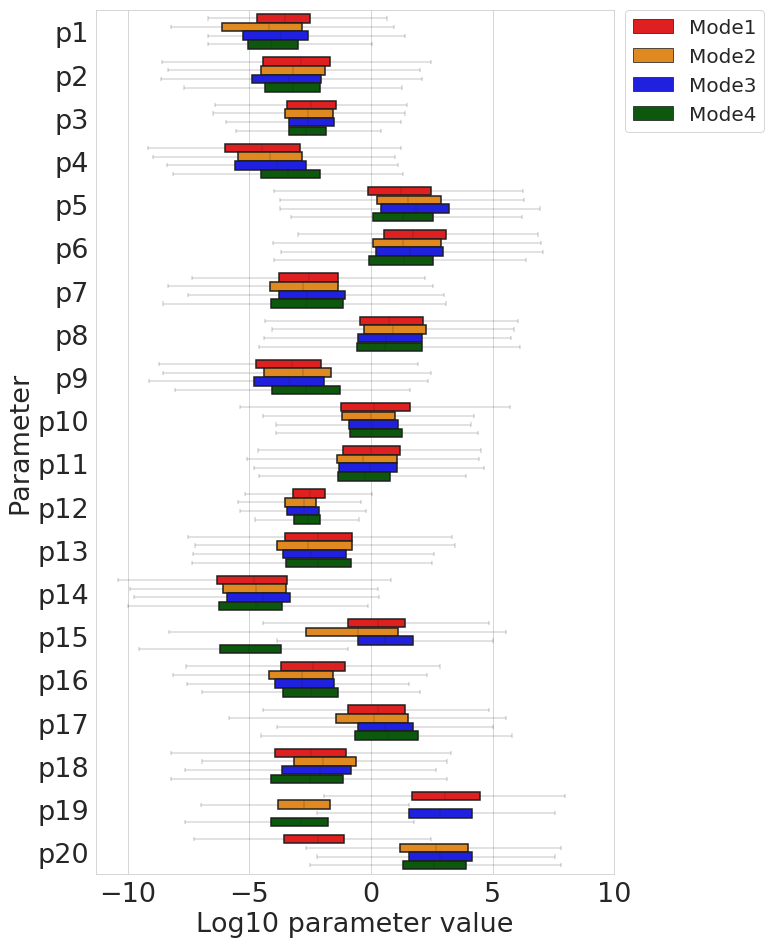

In [296]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1
colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(12,20))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20, showfliers=False, boxprops=dict(alpha=1))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels())
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 20)
plt.ylabel('Parameter',fontsize = 27)
plt.xlabel('Log10 parameter value',fontsize = 27)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
plt.savefig('allmodes_boxplot_first20fittedparams_r1r3.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

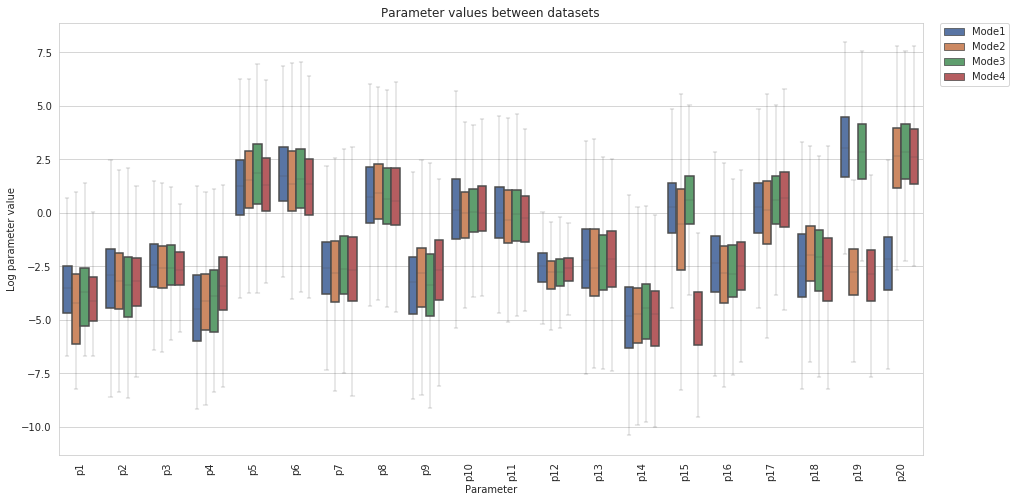

In [42]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df20,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
for i,p in enumerate(model.parameters_rules()):
    print(i,":",p)

In [293]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'df_mode1_mod40upm.pickle',
    'Mode2':'df_mode2_mod40upm.pickle',
    'Mode3':'df_mode3_mod40upm.pickle',
    'Mode4':'df_mode4_mod40upm.pickle'
}

parameter_names = ['p21', 'p22', 'p23', 'p24', 'p25', 'p26', 
                                      'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 
                                      'p36', 'p37', 'p38', 'p39', 'p40']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df40 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

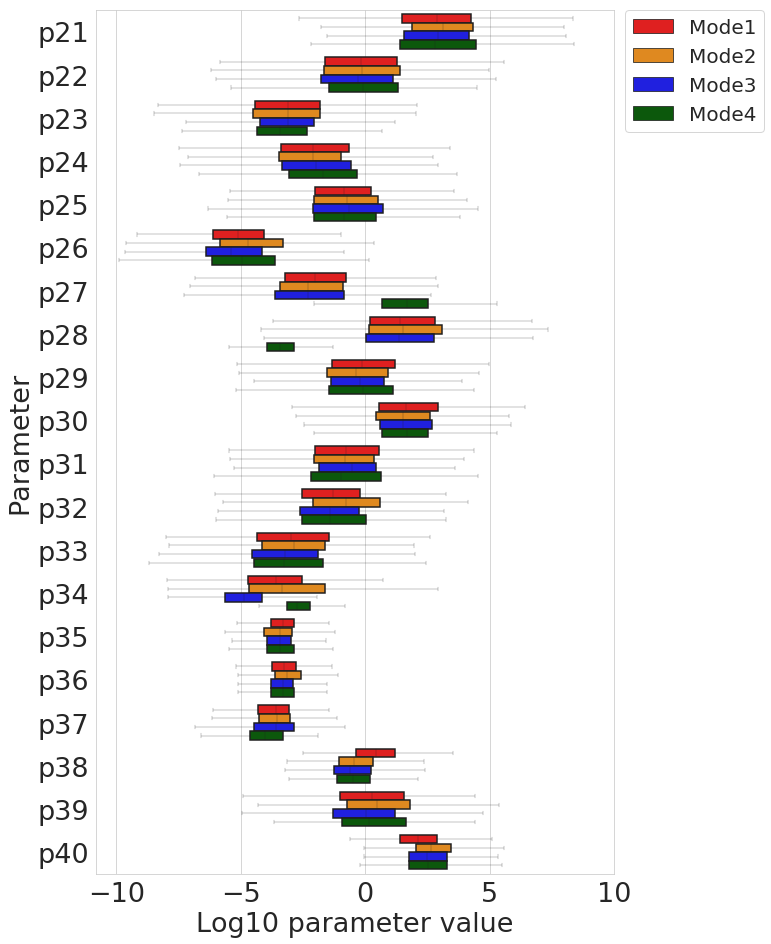

In [295]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(12,20))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df40, showfliers=False, boxprops=dict(alpha=1))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels())
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 20)
plt.ylabel('Parameter',fontsize = 27)
plt.xlabel('Log10 parameter value',fontsize = 27)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
plt.savefig('allmodes_boxplot_last20fittedparams_r1r3.pdf',format='pdf')
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

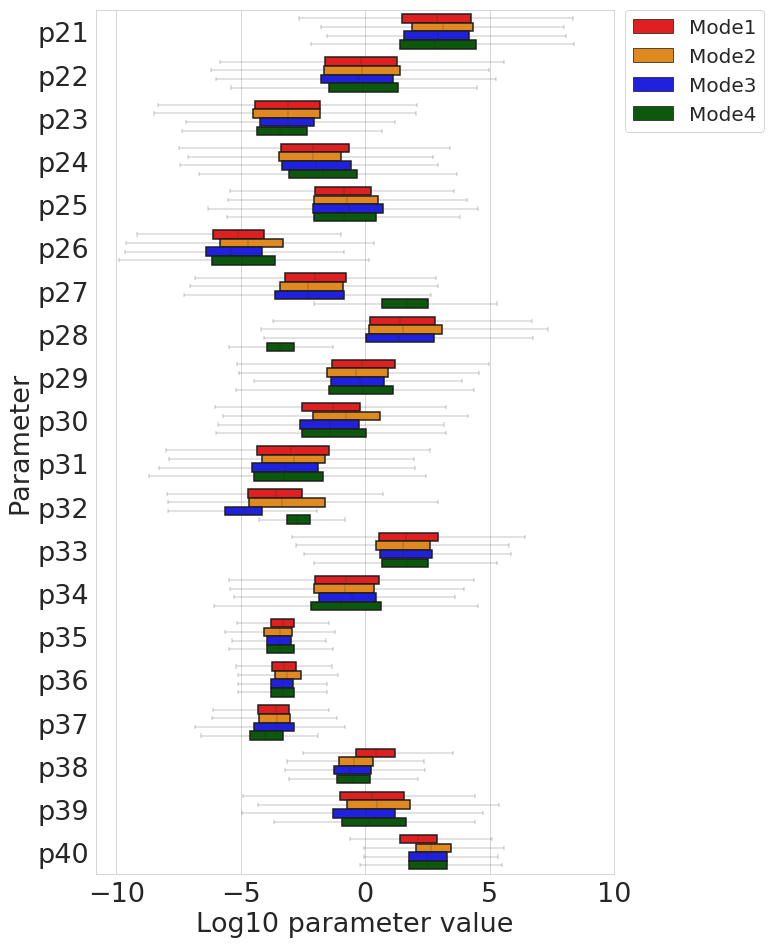

In [48]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

colors = ['red','darkorange', 'blue', 'darkgreen']
sns.set_palette(colors)
fig,ax=plt.subplots(figsize=(12,20))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df40, showfliers=False, boxprops=dict(alpha=1))
# g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels())
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 20)
plt.ylabel('Parameter',fontsize = 27)
plt.xlabel('Log10 parameter value',fontsize = 27)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
ax.set_xticks([-10, -5, 0, 5, 10])
# plt.savefig('allmodes_boxplot_last20fittedparams.pdf',format='pdf')
plt.show()

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20, 10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df40,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df,palette='deep')

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.swarmplot(x='variable',y='value',hue='dataset',data=df,palette='deep')

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

## I have 2 different heatmaps that I plot together, based on whether the 'prior probability' of a model feature was 50% or 33% (the difference
##  being if there were 2 options ('yes vs no') or 3 options ('yes version 1, yes version 2, no') that the model could end up having as that feature.
## Any values I don't want to show up in the heatmap are NaNs (they'll just be white) 
##

## 
## >>> heatmap_left
##                                     A to N    N to A   A to A2   A2 to A    N to Y    Y to N   A2 to Y   Y to A2    A to Y    Y to A   N to A2   A2 to N
## TKO 4 subtypes                    0.359784  0.581464  0.605166  0.700507  0.756747  0.534677  0.359422  0.454997  0.500550  0.632718  0.472469  0.456876
## TKO 3 subtypes (A,A2,Y)           0.000000  0.000000  0.678330  0.772409  0.000000  0.000000  1.000000  0.786813  0.647856  0.852895  0.000000  0.000000
## SCLC-A cells 4 subtypes           0.583748  0.805268  0.508451  0.768907  0.542169  0.783088  0.555209  0.781821  0.407707  0.662860  0.603093  0.596483
## SCLC-A cells 3 subtypes (A,N,A2)  0.626211  0.818104  0.539725  0.791318  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.595339  0.595339
## RPM 4 subtypes                    0.708704  0.892665  0.368979  0.743907  0.448541  0.663174  0.642039  0.688317  0.653948  0.840749  0.477529  0.464575
## RPM 3 subtypes (A,N,Y)            0.738308  0.824759  0.000000  0.000000  1.000000  0.739016  0.000000  0.000000  0.715635  0.883713  0.000000  0.000000
## 
## 
## >>> heatmap_right
##                                   Y effect on division&death  A2&Y effect on division&death  ...  Y effect on late txn  A2&Y effect on late txn
## TKO 4 subtypes                                      0.192093                       0.257139  ...              0.313611                 0.293366
## TKO 3 subtypes (A,A2,Y)                             0.291600                       0.333216  ...              0.191554                 0.222531
## SCLC-A cells 4 subtypes                             0.237888                       0.299335  ...              0.109945                 0.214782
## SCLC-A cells 3 subtypes (A,N,A2)                    0.000000                       0.232997  ...              0.000000                 0.000000
## RPM 4 subtypes                                      0.305645                       0.284531  ...              0.216910                 0.200791
## RPM 3 subtypes (A,N,Y)                              0.472475                       0.000000  ...              0.357381                 0.000000
## 
## [6 rows x 6 columns]
## 
## 

# of course you can remove one if you only need one heatmap
heatmap_left = #
heatmap_right = #

## the list of colors and what values they should match up with are so i can 1) control the heatmap colors a bit better (in the case of cmap1)
##  and 2) so that i can change the value that indicates the 'center' of the colormap and set the 'midway to center' color (cornflowerblue) as 
##  halfway between 0 and the new 'center', and same for the 'midway from center' color (in the case of cmap2)
## there's a way to do this using the matplotlib colormaps themselves (like using 'vlag' instead of listing out the colors like i do here)
## you can see it at https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
colors = ["mediumblue", "cornflowerblue", "white", "lightcoral", "firebrick"]
# for heatmap 1
cmap1 = LinearSegmentedColormap.from_list("mycmap1", list(zip([0,0.25,0.5,0.75,1],colors)))
# for heatmap 2
cmap2 = LinearSegmentedColormap.from_list("mycmap2", list(zip([0,(0.33/2),0.33,(.33+(1-.33)/2),1],colors)))

plt.rcParams.update({'font.size': 18})


In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

# need 2 rows, the top for the colorbars and the bottom for the heatmaps
# and 2 columns, one per heatmap (again if you only have one you could just make 1 column)
fig, (row1,row2) = plt.subplots(ncols=2,nrows=2,figsize=(20,12),gridspec_kw={'width_ratios': [2, 1],'height_ratios':[1,20]})
ax = row2[0]
ax2 = row2[1]
# heatmap 1
sns.heatmap(heatmap_left, cmap=cmap1, ax=ax,cbar=False,vmin=0, vmax=1) #colorbar below won't show all the way to 0 or 1 without vmin=0 and vmax=1 noted
# in sns.heatmap() cbar=False so we can make our own colorbar
cbar1 = fig.colorbar(ax.collections[0], cax=row1[0], orientation="horizontal")
# heatmap 2
sns.heatmap(heatmap_right, cmap=cmap2, ax=ax2,cbar=False,vmin=0, vmax=1)
cbar2 = fig.colorbar(ax2.collections[0], cax=row1[1], orientation="horizontal")
# name the colorbars and set ticks where you want
cbar1.ax.set_title('Heatmap label 1',fontsize=16)
row1[0].xaxis.set_ticks_position('top')
cbar1.set_ticks([0,.5,1])
cbar1.ax.set_xticklabels([0,.5,1],fontsize=16)
cbar2.ax.set_title('Heatmap label 2',fontsize=16)
row1[1].xaxis.set_ticks_position('top')
cbar2.set_ticks([0,.33,1])
cbar2.ax.set_xticklabels([0,.33,1],fontsize=16)
# rotate (or not) the axes labels and if rotated, make it so the end of the label words is aligned with the actual tick
ax2.set_yticks([]) # using the same y axis labels for left and right so only show the labels all the way on the left
ax.tick_params(axis='y',rotation=0)   
ax.tick_params(axis='x',rotation=50)  
ax2.tick_params(rotation=50)          
# this is what's doing the aligning the label to the tick despite any rotation
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
fig.subplots_adjust(wspace=0.1,hspace=0.05,bottom=0.45,top=0.9,left=0.31,right=0.95)
plt.savefig('my_figure.pdf',format='pdf')
plt.show()

In [ ]:
print(clus0_100)

In [ ]:
clus0mod = clus0_100[:, 14:]
clus1mod = clus1_100[:, 14:]
clus2mod = clus2_100[:, 14:]
clus3mod = clus3_100[:, 14:]

In [ ]:
clusall = np.concatenate((clus0_100, clus1_100, clus2_100, clus3_100))

In [ ]:
clusall.shape

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from MOD_analysis.necro_uncal_new_updated import model
# from pydream.core import run_dream
from pysb.simulator import ScipyOdeSimulator
import numpy as np
# from pydream.parameters import SampledParam
# from pydream.convergence import Gelman_Rubin
from scipy.stats import norm,uniform
# from necro_uncal_new import model
import seaborn as sns
from matplotlib import pyplot as plt
import random
# sns.set()
random.seed(0)

chain0 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_0_50000.npy')
chain1 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_1_50000.npy')
chain2 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_2_50000.npy')
chain3 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_3_50000.npy')
chain4 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_4_50000.npy')

logps0 = np.load('necro_smallest_dreamzs5620_5chain_logps_0_50000.npy')
logps1 = np.load('necro_smallest_dreamzs5620_5chain_logps_1_50000.npy')
logps2 = np.load('necro_smallest_dreamzs5620_5chain_logps_2_50000.npy')
logps3 = np.load('necro_smallest_dreamzs5620_5chain_logps_3_50000.npy')
logps4 = np.load('necro_smallest_dreamzs5620_5chain_logps_4_50000.npy')

In [ ]:
total_iterations = chain0.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :],chain1[burnin:, :],chain2[burnin:, :],chain3[burnin:, :]
                          ,chain4[burnin:, :]))

In [ ]:
chain00 = np.load('param_files/necro_smallest_dreamzs5720_5chain_sampledparams_0_50000.npy')
chain11 = np.load('param_files/necro_smallest_dreamzs5720_5chain_sampledparams_1_50000.npy')
chain22 = np.load('param_files/necro_smallest_dreamzs5720_5chain_sampledparams_2_50000.npy')
chain33 = np.load('param_files/necro_smallest_dreamzs5720_5chain_sampledparams_3_50000.npy')
chain44 = np.load('param_files/necro_smallest_dreamzs5720_5chain_sampledparams_4_50000.npy')

logps00 = np.load('param_files/necro_smallest_dreamzs5720_5chain_logps_0_50000.npy')
logps11 = np.load('param_files/necro_smallest_dreamzs5720_5chain_logps_1_50000.npy')
logps22 = np.load('param_files/necro_smallest_dreamzs5720_5chain_logps_2_50000.npy')
logps33 = np.load('param_files/necro_smallest_dreamzs5720_5chain_logps_3_50000.npy')
logps44 = np.load('param_files/necro_smallest_dreamzs5720_5chain_logps_4_50000.npy')

In [ ]:
len(chain00)

In [ ]:
total_iterations = chain00.shape[0]
burnin = int(total_iterations / 2)
samples1 = np.concatenate((chain00[burnin:, :],chain11[burnin:, :],chain22[burnin:, :],chain33[burnin:, :]
                          ,chain44[burnin:, :]))

In [ ]:
ppriors = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
         0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
         0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
         0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
         0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
         0.0008584654, 8.160445e-05, 4.354384e-03,0.008584654,8.160445e-02, 4.354384e-02,1.278903])

In [ ]:
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
                 color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
    sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
#     plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
#     counter += 1
#     plt.ylim(ymax=0.65)
#     plt.xlim(xmin = -10,xmax=10)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
# #     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# # plt.subplots(8, 5, sharex='all', sharey='all')
# #     ax.set_xlabel('common xlabel')
# #     ax.set_ylabel('common ylabel')
# # plt.xlabel("Log(10) Value", fontsize=14)
# # plt.ylabel("Probability", fontsize=14, labelpad=15)    
# plt.subplots_adjust(wspace=0.3)
# plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(26, 38,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 10
col = 4
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(15, 25))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01ee][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=False, rug=False, label = 'Mode 1')
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=False, rug=False, label = 'Mode 2'
                , color = 'indianred')
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=False, rug=False, label = 'Mode 3'
                , color = 'orange')
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=False, rug=False, label = 'Mode 4'
                , color = 'green')
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(38, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 16
# idx = list(range(14, 51,1))
row = 8
col = 2
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(15, 25))
for i in range(1,17):
    ax = fig.add_subplot(8, 2, i)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01ee][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=False, rug=False, label = 'Mode 1')
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=False, rug=False, label = 'Mode 2'
                , color = 'indianred')
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=False, rug=False, label = 'Mode 3'
                , color = 'orange')
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=False, rug=False, label = 'Mode 4'
                , color = 'green')
#     sns.distplot(data = [np.log10(clus0mod[:][:, counter]),
#                           np.log10(clus1mod[:][:, counter]),
#                           np.log10(clus2mod[:][:, counter]),
#                           np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.distplot(np.log10(clus0mod[:][:, counter]))
#     sns.distplot(np.log10(clus1mod[:][:, counter]), color = 'indianred')
#     sns.distplot(np.log10(clus2mod[:][:, counter]), color = 'mediumseagreen')
#     sns.distplot(np.log10(clus3mod[:][:, counter]), color = 'gold')
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'indianred', hist=False, rug=True)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), hist=False, rug=True)
    
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'mediumseagreen')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
#     plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 26,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 4
col = 3
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
    sns.violinplot(data = [np.log10(clus0mod[:][:, counter]),
                          np.log10(clus1mod[:][:, counter]),
                          np.log10(clus2mod[:][:, counter]),
                          np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
    xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.violinplot(data = [np.log10(clus0mod[:][:, counter]),
                          np.log10(clus1mod[:][:, counter]),
                          np.log10(clus2mod[:][:, counter]),
                          np.log10(clus3mod[:][:, counter])])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
#                  color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
#     plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
                 color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior_57',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=False, rug=False,bins = 10,
                 label = 'post_all',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=False, rug=False,bins = 10,
                 label = 'post_unq',hist_kws=dict(edgecolor="purple", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior_57',hist_kws=dict(edgecolor="purple", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
chain0 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_0_50000.npy')
chain1 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_1_50000.npy')
chain2 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_2_50000.npy')
chain3 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_3_50000.npy')
chain4 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_4_50000.npy')

logps0 = np.load('necro_smallest_dreamzs52920_5chain_logps_0_50000.npy')
logps1 = np.load('necro_smallest_dreamzs52920_5chain_logps_1_50000.npy')
logps2 = np.load('necro_smallest_dreamzs52920_5chain_logps_2_50000.npy')
logps3 = np.load('necro_smallest_dreamzs52920_5chain_logps_3_50000.npy')
logps4 = np.load('necro_smallest_dreamzs52920_5chain_logps_4_50000.npy')

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.plot(iters, logps1, color = 'k')
plt.plot(iters, logps2, color = 'g') #best
plt.plot(iters, logps3, color = 'cyan')
plt.plot(iters, logps4, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.xlim(xmin = 25000, xmax = 50000)
plt.ylim(ymin = -200)
plt.savefig('pydream_priorpost_traceplot_forpapermay5720_all_chains5burnin_72521.pdf', format='pdf')
plt.show()

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps00, color = 'red')
plt.plot(iters, logps11, color = 'k')
plt.plot(iters, logps22, color = 'g') #best
plt.plot(iters, logps33, color = 'cyan')
plt.plot(iters, logps44, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.xlim(xmin = 0, xmax = 50000)
plt.ylim(ymin = -250)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5zoom_72221.pdf', format='pdf')
plt.show()

In [ ]:
unique, counts = np.unique(samples1, return_counts=True)

print(np.asarray((unique, counts)).T)

In [ ]:
# saves the most likely parameter from the posterior distribution
u, indices, counts = np.unique(samples1, return_index=True, return_counts=True)
print(counts)
# print(np.asarray((u, counts)).T)
max_idx = np.argmax(counts)
# len(u)
# np.save('most_likely_par_500000_earm.npy', u[max_idx])

In [ ]:
plt.figure()
plt.hist(max_idx, bins = 10, histtype='bar',alpha=0.5, ec ='black')
plt.xlabel('Parameter Indices Mode 1',fontsize = 16)
plt.ylabel('Frequency (Degeneracy)',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
# plt.savefig('nerm_paramdegeneracy_mode1_test.pdf')
plt.show()

In [ ]:
u, indices, counts = np.unique(samples1, return_index=True, return_counts=True, axis=0)

max_idx = np.argsort(counts)

print(len(max_idx[:667]))

In [ ]:
import numpy as np

# import all parameter sets from PyDREAM and pull out the unique ones, along with their counts
pvals_all = samples1[25000:50000]
pvals_unique, counts = np.unique(pvals_all, return_counts=True, axis=0)

# import the parameter sets for the mode you're interested in
pvals_modeX = np.unique(pvals_all, axis=0)

#######################################################
# mix up the order of the array to test out the code
#######################################################
max_idx = np.argsort(counts)
pvals_modeX = np.array([pvals_modeX[i] for i in max_idx])
#######################################################

mode_counts = []
for p in pvals_modeX:
    for i,u in enumerate(pvals_unique):
        if (p == u).all():
            mode_counts.append(counts[i])
            # print(i)
            continue

print(mode_counts)

In [ ]:
#232+181+176+176+140+133+93+87+87+27

In [ ]:
occurrences = collections.Counter(mode_counts)
print(occurrences)

In [ ]:
def countX(mode_counts, x):
    count = 0
    for ele in mode_counts:
        if (ele == x):
            count = count + 1
    return count
x = [1,2]
print('{} has occurred {} times'.format(x, countX(mode_counts, x)))

In [ ]:
print(len(mode_counts==1))

In [ ]:
print(len(samples1))

In [ ]:
pvals_all = samples1
pvals_unique, counts = np.unique(pvals_all, return_counts=True, axis=0)

pvals_modeX = np.unique(mode3_100, axis=0)

mode_counts = []
for p in pvals_modeX:
    for i,u in enumerate(pvals_unique):
        if (p == u).all():
            mode_counts.append(counts[i])
            # print(i)
            continue

print(mode_counts)

In [ ]:
mode1_100

In [ ]:
mode1_100 = np.load('param_files/necro_pars10k_cluster1_5720_mod.npy')[:,14:]
mode1_100 = np.log10(mode1_100)
mode2_100 = np.load('param_files/necro_pars10k_cluster2_5720_mod.npy')[:,14:]
mode2_100 = np.log10(mode2_100)
mode3_100 = np.load('param_files/necro_pars10k_cluster3_5720_mod.npy')[:,14:]
mode3_100 = np.log10(mode3_100)
# mode4_100 = np.load('param_files/necro_pars10k_cluster4_5720_mod.npy')[:,14:]
mode4ex_100 = np.load('param_files/necro_pars10k_cluster4_5720_mod_wextra667.npy')[:,14:]

In [ ]:
np.repeat(mode1_100[:2,:], 2, axis=0)

In [ ]:
samples1[(mode2_100[:,:] == samples1).all(axis=(2,3)).any(0)]

In [ ]:
sum = 0 # number of overlapping rows
for i in range(samples1.shape[0]): # iterate over all rows of val_dataset
    overlap = (mode2_100 == samples1[i,:,:]).all(axis=1).all(axis=1).sum()
    if overlap:
        sum += 1
print(sum)

In [ ]:
import timeit
import collections
timeit(collections.Counter(map(tuple, mode2_100)))

In [ ]:
c = collections.Counter(map(tuple, mode1_100))

In [ ]:
timeit Counter(map(tuple, a))
10000 loops, best of 3: 28.5 µs per loop

c = Counter(map(tuple, a))

c
Counter({(2, 2, 2): 3, (1, 1, 1): 3, (3, 3, 0): 3})

In [ ]:
np.save('param_files/most_likely_par_10k_necropydream_may72020_667extra.npy', u[:667])

In [ ]:
sample25000_1 = samples1[:25000]

In [ ]:
samplist = list(samples1[34:41])

In [ ]:
print(samplist)

In [ ]:
from collections import Counter
Counter(samples1)

In [ ]:
import collections
a = list(samples1[34:41])
counter=collections.Counter(a)
print(counter)

In [ ]:
print(samples1[34:41])

In [ ]:
a = samples1[:10]

# no_dupes = [x for n, x in enumerate(a) if x not in a[:n]]
# print(no_dupes) # [[1], [2], [3], [5]]

dupes = [x for n, x in enumerate(a) if x in a[:n]]
# np.savetxt('dupes_samples1_5720.txt', dupes)
print(dupes) # [[1], [3]]

In [ ]:
u, indices, counts = np.unique(samples1, return_index=True, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps3, color = 'cyan')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps4, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [ ]:
iters = [i for i in range(20000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps3, color = 'cyan')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [ ]:
total_iterations = chain00.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain00[burnin:, :],chain01[burnin:, :],chain02[burnin:, :],chain03[burnin:, :]
                          ,chain04[burnin:, :],chain05[burnin:, :],chain06[burnin:, :],chain07[burnin:, :]
                         ,chain10[burnin:, :],chain11[burnin:, :],chain12[burnin:, :],chain13[burnin:, :]
                          ,chain14[burnin:, :],chain15[burnin:, :],chain16[burnin:, :],chain17[burnin:, :]
                         ,chain20[burnin:, :],chain21[burnin:, :],chain22[burnin:, :],chain23[burnin:, :]
                          ,chain24[burnin:, :],chain25[burnin:, :],chain26[burnin:, :],chain27[burnin:, :]
                         ,chain30[burnin:, :],chain31[burnin:, :],chain32[burnin:, :],chain33[burnin:, :]
                          ,chain34[burnin:, :],chain35[burnin:, :],chain36[burnin:, :],chain37[burnin:, :]))

In [ ]:
total_iterations = chain0.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :],chain1[burnin:, :],chain2[burnin:, :],chain3[burnin:, :]
                          ,chain4[burnin:, :]))

In [ ]:
idx_pars_calibrate = [1,2,3,4,5,6,7,8,9,10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

ndims = len(idx_pars_calibrate)
colors = sns.color_palette(n_colors=ndims)
rows = 11
columns = 6
counter = 0

# Save most likely parameter
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argsort(counts)[::-1]
# np.save('most_likely_par_100000.npy', u[max_idx])

# plt.figure(figsize = (20,10))
f, axes = plt.subplots(rows, columns, figsize=(20,15), sharex=True)
for r in range(rows):
    for c in range(columns):
        weights = np.ones_like(samples[:, counter]) / float(len(samples[:, counter]))
        # axes[r, c].vlines(u[max_idx[:50]][:, counter], ymin=0, ymax=0.01, color='k', linestyle='solid', linewidth=0.0001)
        axes[r, c].hist(samples[:, counter], bins=25, color=colors[counter], weights=weights)
        axes[r, c].set_title(model.parameters[idx_pars_calibrate[counter]].name, fontdict={'fontsize': 8})
        # axes[r, c].set_xlim(-6, 6)
        counter += 1

        if counter > len(idx_pars_calibrate):
            break
f.add_subplot(111, frameon=False)
f.subplots_adjust(hspace=0.5)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Log(Parameter value)", fontsize=14)
plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pars_dist_plot_box_GI.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0


# logps_vals = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
#          0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
#          0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
#          0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
#          0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
#          0.0008584654, 8.160445e-05, 4.354384e-06, 4.278903])

ppriors = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
         0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
         0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
         0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
         0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
         0.0008584654, 8.160445e-05, 4.354384e-03,0.008584654,8.160445e-02, 4.354384e-02,1.278903])

# ppriors = np.array([-5.03871991, -2.77422173, -0.87287986, -3.8760241 ,  1.54175233,
#                     1.08943647, -2.63610537,  0.49975965, -3.01430015,  0.12203582,
#                     0.07983158, -3.40562578, -2.10699587, -5.01896387, -4.35501468,
#                    -2.65519923, -2.35945571,  0.41170187, -2.3781722 ,  2.65259615,
#                     3.06046232, -0.52024266, -2.78955419, -2.25695819, -0.90656227,
#                    -4.65795804, -1.92138073,  1.14788202, -0.26424152, -1.15479565,
#                    -3.05805226, -3.40083046,  1.29668243, -0.39993474, -2.29694278,
#                    -2.67155369, -3.23454522, -2.23736425,  0.60477365,  1.11330035])
# print(len(logps_vals))
# quit()
# nonlogps_vals = 10 ** logps_vals
# print(nonlogps_vals)
# quit()
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 50000

# f, axes = plt.subplots(row, col, figsize=(15, 10), sharex=True)
# # f.suptitle("Posterior Distributions from PyDREAM calibration of Necroptosis Model", fontsize="x-large")
# # for dim, param in enumerate(sampled_params_list):
#
# for r in range(row):
#     for c in range(col):
#         # data_uniform = uniform.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter])
#         sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]),color='red', ax=axes[r,c])

# #CHAINS
# chain0 = np.load('dreamzs_5chain_sampled_params_chain_922_0_50000.npy')
# chain1 = np.load('dreamzs_5chain_sampled_params_chain_922_1_50000.npy')
# chain2 = np.load('dreamzs_5chain_sampled_params_chain_922_2_50000.npy')
# chain3 = np.load('dreamzs_5chain_sampled_params_chain_922_3_50000.npy')
# chain4 = np.load('dreamzs_5chain_sampled_params_chain_922_4_50000.npy')

# chain0 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_0_50000.npy')
# chain1 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_1_50000.npy')
# chain2 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_2_50000.npy')
# chain3 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_3_50000.npy')
# chain4 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_4_50000.npy')

# logps0 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_0_50000.npy')
# logps1 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_1_50000.npy')
# logps2 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_2_50000.npy')
# logps3 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_3_50000.npy')
# logps4 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_4_50000.npy')



# # logps = np.load('dreamzs_5chain_logps_chain_922_4_50000.npy')
# # print(logps)
# # quit()

# total_iterations = chain0.shape[0]
# burnin = int(total_iterations/2)
# samples = np.concatenate((chain0[burnin:, :], chain1[burnin:, :], chain2[burnin:, :], chain3[burnin:, :], chain4[burnin:, :]))

# print(len(samples))
# u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

# max_idx = np.argsort(counts)
# np.save('pydream_most_likely_par_6707_final.npy', u[max_idx])
# print('done')
# print(len(max_idx))
# print(max_idx)
# print(len(u[max_idx]))
# print(len(u[46438:]))

# quit()
# print(10 ** samples[:2])
# quit()
# samples_nonlog = 10 ** samples
ndims = len(idx)
# scaling = [3] * 37
# idx = list(range(14, 51,1))
# row = 8
# col = 5
# counter = 0
# n = 10000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymax=0.65)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# plt.subplots(8, 5, sharex='all', sharey='all')
#     ax.set_xlabel('common xlabel')
#     ax.set_ylabel('common ylabel')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)    
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
# fig = plt.figure(figsize=(20, 15))
# for i in range(1,41):
#     ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
# fig = plt.figure(figsize=(20, 5))
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
plt.subplot(131)
sns.distplot(samples[:, 14])
sns.distplot(samples[:, 17])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub + A20/CYLD -> RIP1ub:A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=20)
plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{F}$',r'$CYLD_{F}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(132)
sns.distplot(samples[:, 15])
sns.distplot(samples[:, 18])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20 -> RIP1ub + A20/CYLD', fontsize=15)
plt.xlabel("Log(10) Value", fontsize=20)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{R}$',r'$CYLD_{R}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(133)
sns.distplot(samples[:, 16])
sns.distplot(samples[:, 19])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20/CYLD -> RIP1deub + A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=17)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{CAT}$',r'$CYLD_{CAT}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf', format='pdf')
# plt.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
fig.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
plt.show()

In [ ]:
len(samples[:, 14])

In [ ]:
clus0_100 = np.load('necro_pars10k_cluster0_5720.npy')
clus1_100 = np.load('necro_pars10k_cluster1_5720.npy')
clus2_100 = np.load('necro_pars10k_cluster2_5720.npy')
clus3_100 = np.load('necro_pars10k_cluster3_5720.npy')

In [ ]:
chainc0 = clus0_100[:][:,14:]
chainc1 = clus1_100[:][0,14:]
chainc2 = clus2_100[:][0,14:]
chainc3 = clus3_100[:][0,14:]
# print(chainc0.shape)
print(chainc0[:,14].shape)

In [ ]:
plt.figure()
# sns.distplot(norm.rvs(size=n, loc=ppriors[14], scale=scaling[14]), color = 'red')
sns.distplot(chainc0[:, 14])
# sns.distplot(chainc0[:, 17])
# plt.title(model.parameters[idx[15]].name, fontdict={'fontsize': 14})
# counter += 1
plt.ylim(ymin=0,ymax = 0.009)
plt.xlim(xmin = 2.5,xmax=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# plt.subplots(8, 5, sharex='all', sharey='all')
#     ax.set_xlabel('common xlabel')
#     ax.set_ylabel('common ylabel')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)    
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
print(len(model.initial_conditions))

In [ ]:
print(model.parameters)

In [ ]:
idx = list(range(0, 30,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(30, 10))
for i in range(1,31):
    plt.subplot(5, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None, wspace=None, hspace=0.5)
#     plt.tight_layout()
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
idx = list(range(30, 62,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(22, 25))
for i in range(31,62):
    plt.subplot(11, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
# saves the most likely parameter from the posterior distribution
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argmax(counts)
np.save('most_likely_par_500000_earm.npy', u[max_idx])

In [ ]:
x = np.array([1,1,1,2,2,2,5,25,1,1])
unique, counts = np.unique(x, return_counts=True)

print np.asarray((unique, counts)).T

In [ ]:
best_pars = np.load('most_likely_par_500000_earm.npy')
print(best_pars)

In [ ]:
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

max_idx = np.argsort(counts)

print(len(max_idx))
# print(len(u[667:]))

In [ ]:
np.save('most_likely_par_10k_necropydream_may72020.npy', u[667:])

In [ ]:
best_pars = np.load('most_likely_par_100000.npy')
print(best_pars)